# US Flights of 2008
## by (Ahmed Almalki)

## Investigation Overview

> Exploring US flights of 2008 and answering on:-
> - what are the best states in terms of delayed and cancelled flighes?
> - what are the best airlines in terms of delayed and cancelled flighes?
> - what are the worst flights in terms of delayed and cancelled flighes?

## Dataset Overview

> The dataset reports flights in the United States, including carriers, arrival and departure delays from 1987 to 2008. Actually, the report treated flight details of 2008 which is (7,009,728) observations.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2008.csv')
df_airports = pd.read_csv('airports.csv')
df_airlines = pd.read_csv('carriers.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

In [3]:
airlines_mean = df.groupby('UniqueCarrier', as_index=False).mean()
airlines_count = df.groupby('UniqueCarrier', as_index=False).count()

airlines = airlines_mean[['UniqueCarrier','ArrDelay','Cancelled']].merge(
    airlines_count[['UniqueCarrier','Year']], on='UniqueCarrier'
)
airlines.rename(columns={'Year':'Count'}, inplace=True)

airlines['Size'] = airlines.Count.map(lambda x: round(x/120000)+1)
airlines['Size'] = airlines.Size.map(lambda x: 7 if x>7 else x)

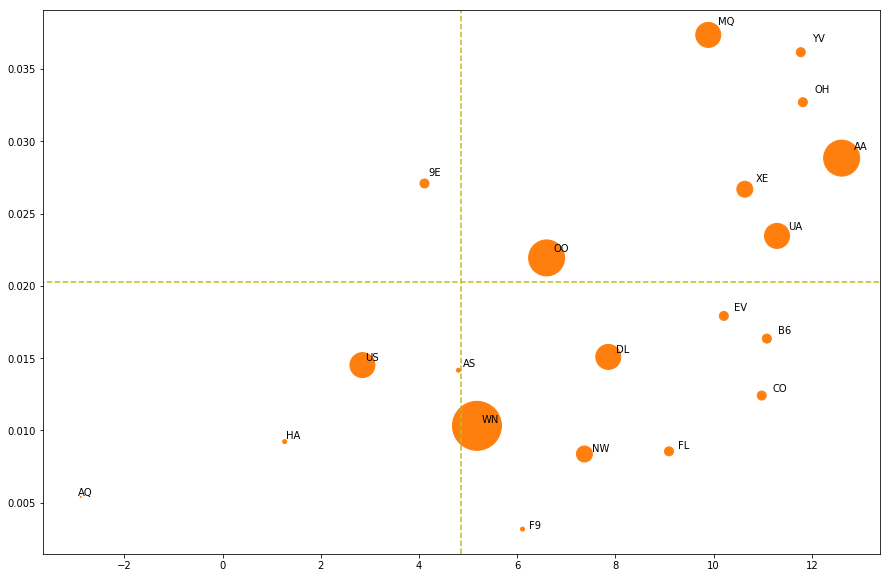

In [28]:

plt.figure(figsize=[15,10])
ax = plt.subplot()
ax.scatter(airlines.ArrDelay, airlines.Cancelled, s=airlines.Size**4, c='C1')

x_max = max(airlines.ArrDelay)
x_min = min(airlines.ArrDelay)

y_max = max(airlines.Cancelled)
y_min = min(airlines.Cancelled)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

ax.set_xlim(x_min-x, x_max+x)
ax.set_ylim(y_min-y, y_max+y)
ax.axhline(y=y_max-(y_len/2), xmin=x_min*.9, xmax=x_max*.9, linestyle='--', color='C8')
ax.axvline(x_max - (x_len/2), linestyle='--', color='C8')

for i, txt in enumerate(airlines.UniqueCarrier):
    ax.annotate(txt, (airlines.ArrDelay[i]*1.02, airlines.Cancelled[i]*1.02));


## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'wrangle_report.ipynb'])

!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle